<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_21_Bi_Multi_variate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')

In [3]:
flight = sns.load_dataset('flights')

In [4]:
iris = sns.load_dataset('iris')

In [5]:
titanic = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day21-bivariate-analysis/train.csv')

# **Scatter-plot** (Numerical - Numerical)

In [6]:
import plotly.express as px

In [13]:
px.scatter(y = tips['tip'], x = tips['total_bill'],color = tips['smoker'],symbol = tips['sex'])

<Axes: xlabel='total_bill', ylabel='tip'>

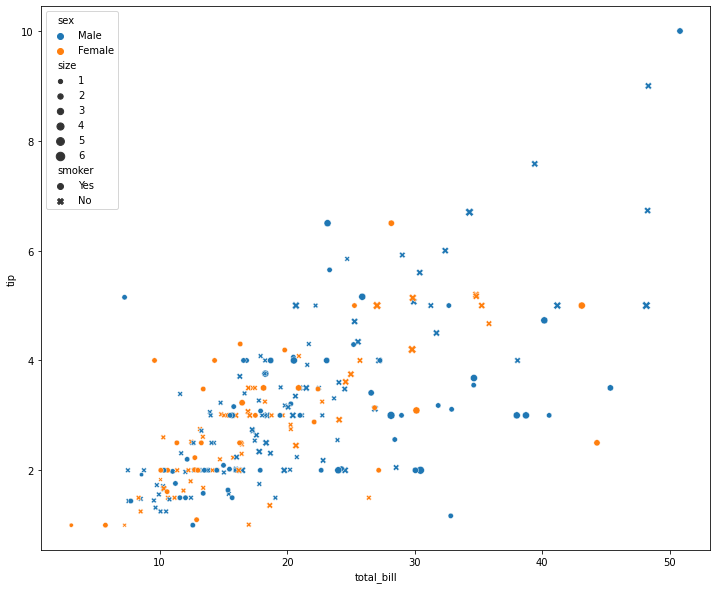

In [18]:
plt.figure(figsize = (12,10))
sns.scatterplot(y = tips['tip'], x = tips['total_bill'],hue = tips['sex'],style = tips['smoker'],size = tips['size'])

# **Bar Plot**(Numerical - Categorical)

<Axes: xlabel='Pclass', ylabel='Age'>

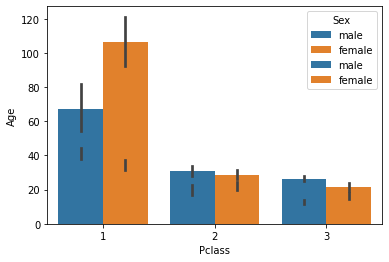

In [28]:
sns.barplot(data = titanic, x = 'Pclass', y = 'Fare',hue = 'Sex')
sns.barplot(data = titanic, x = 'Pclass', y = 'Age',hue = 'Sex')

# **Box-plot**(Numerical-categorical)

In [30]:
px.box(data_frame = titanic, x = 'Sex', y = 'Age', color = 'Survived')

<Axes: xlabel='Sex', ylabel='Age'>

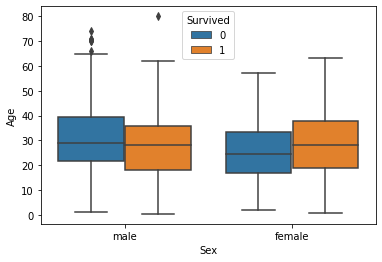

In [31]:
sns.boxplot(data = titanic, x = 'Sex', y = 'Age', hue = 'Survived')

# **Distplot**(Numerical-categorical)

In [38]:
import warnings

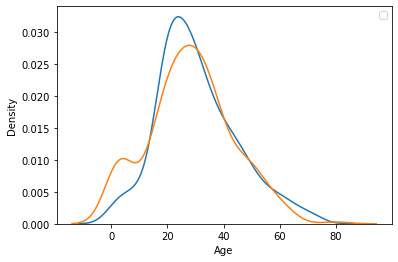

In [41]:
warnings.filterwarnings('ignore')
sns.distplot(titanic[titanic['Survived']==0]['Age'], hist = False)
sns.distplot(titanic[titanic['Survived']==1]['Age'], hist = False)

Very intersting graph, it shows the probability of surviving vs dieing at specific age. Some important takeways from this graph is :


1.   The probability of surviving of child(0-15) is more than his dieng and this thing is obvious too
2.   The prob. of dying of a youngster is more than of his surviving, there could be several reasons for that like number of youngsters were more, they were helping others.



# **Heatmap**

## **Cross-Tab**(Categorical -Categorical)

In [43]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Pclass', ylabel='Survived'>

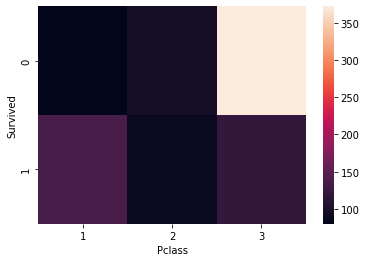

In [44]:
sns.heatmap(pd.crosstab(titanic['Survived'], titanic['Pclass']))

Let's see it in percentage

<Axes: ylabel='Survived'>

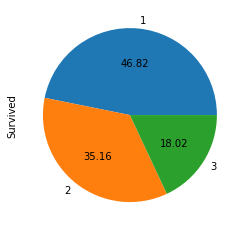

In [48]:
(titanic.groupby('Pclass').mean()['Survived']*100).plot(kind = 'pie',autopct = '%.2f')

<Axes: ylabel='Survived'>

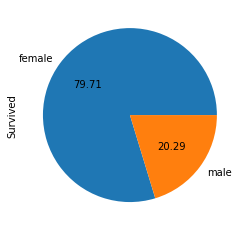

In [49]:
(titanic.groupby('Sex').mean()['Survived']*100).plot(kind = 'pie',autopct = '%.2f')

# **Cluster-Map**(Categorical -Categorical)

In [54]:
pd.crosstab(titanic['SibSp'], titanic['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


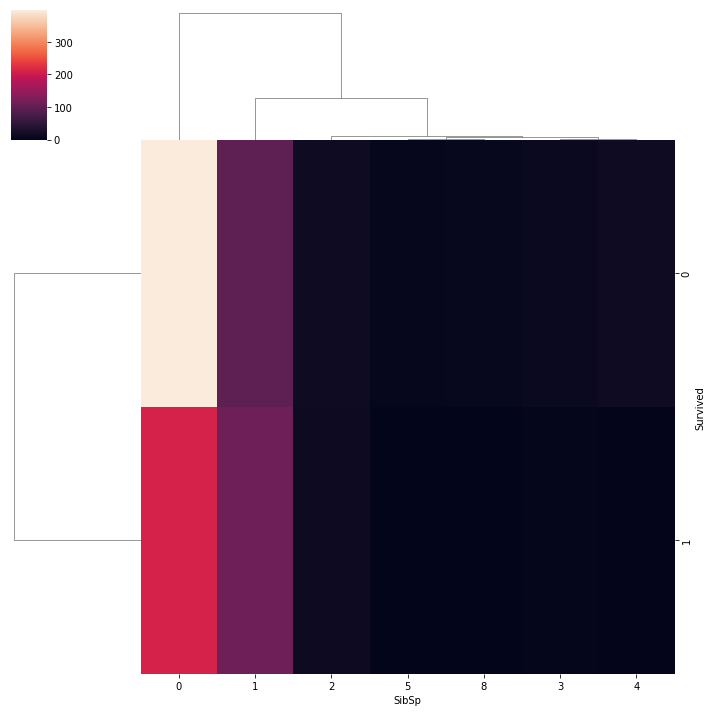

In [52]:
sns.clustermap(pd.crosstab(titanic['Survived'], titanic['SibSp']))

# **Pair-Plot**

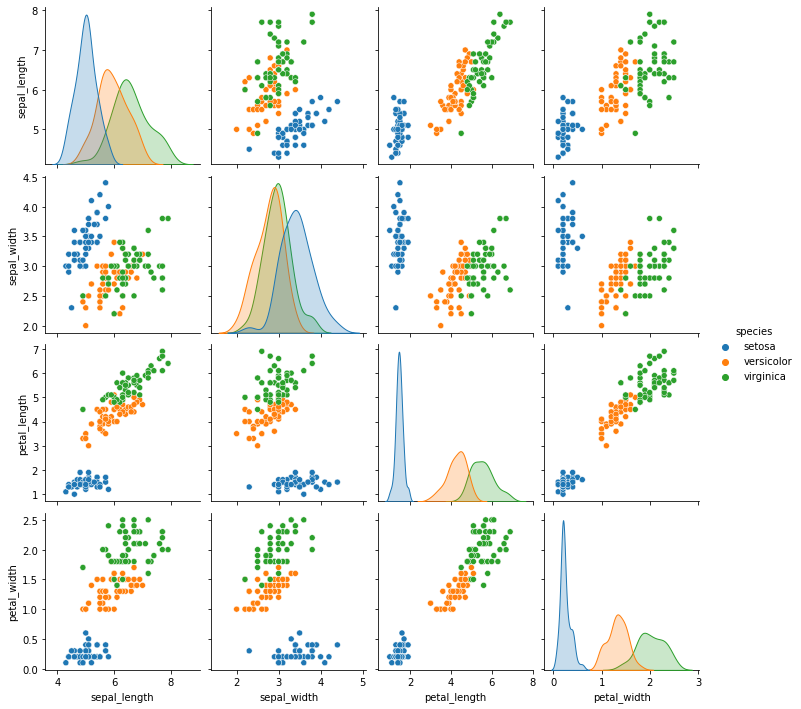

In [56]:
sns.pairplot(iris, hue = 'species')

# **Line-Plot**
If x-axis is related to time somehow

In [61]:
df = flight.groupby('year').sum()

<Axes: xlabel='year', ylabel='passengers'>

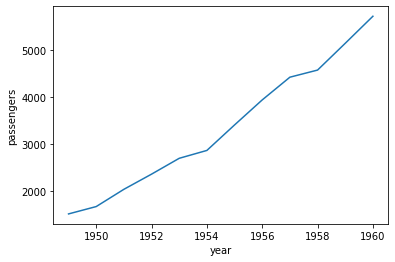

In [66]:
sns.lineplot(data = df, x = 'year', y = 'passengers')

# **Pivot-tables**

In [67]:
flight

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [70]:
flight.pivot_table(values = 'passengers', index = 'month', columns = 'year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

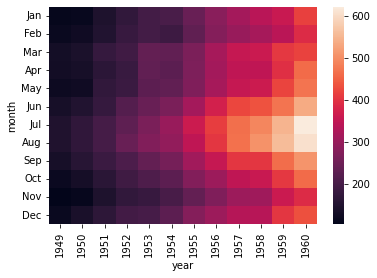

In [71]:
sns.heatmap(flight.pivot_table(values = 'passengers', index = 'month', columns = 'year'))

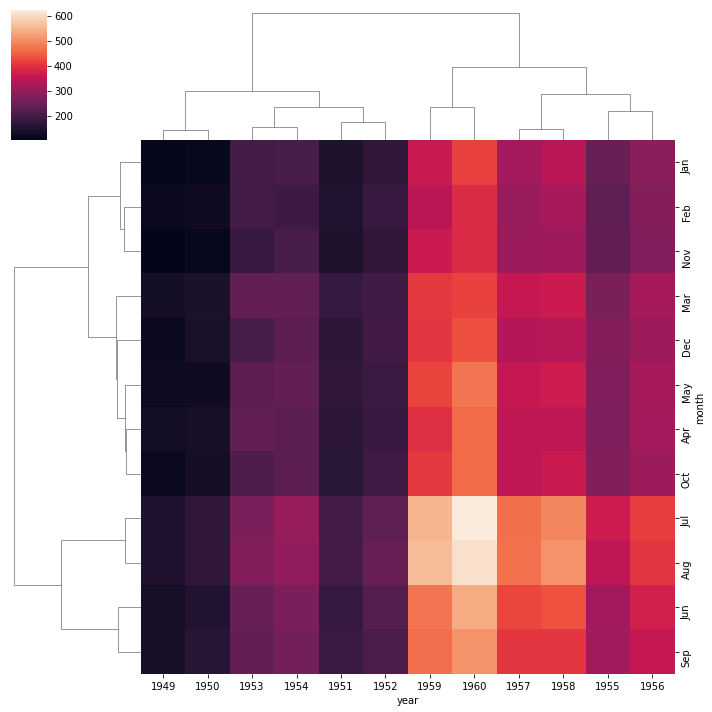

In [72]:
sns.clustermap(flight.pivot_table(values = 'passengers', index = 'month', columns = 'year'))